Código compartido:

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import math


Funciones de prueba

In [197]:
#minimizacion de la funcion
#funciones de prueba
def f0(x):
  # x => [-10,10]
  return 3*x[0]**4 + (x[0]-1)**2# x[0]**2 #3*x[0]**4 + (x[0]-1)**2

def f1(x):
  # x1,x2 => [-5,10]
  y = (1.5 - x[0]*(1.0-x[1]))**2 + (2.25 - x[0]*(1.0-x[1]**2))**2 + (2.625 - x[0]*(1.0-x[1]**3))**2
  return y

def f2(x):
  # x1,x2,x3,x4 => [-20,20]
  y = (10.0*(x[1]-x[0]**2))**2 + (1.0-x[0])**2 + 90.0*(x[3]-x[2]**2)**2 + (1.0-x[2])**2 + 10.0*(x[1]+x[3]-2.0)**2 + 0.1*(x[1]-x[3])**2
  return y

#def FP1():
def fackley(x):
    # x => [-32.768 , 32.768]
    a=20
    b=0.2
    c=2*math.pi 
    d=len(x) #d=2
    s1=0 
    s2=0 
    for i in range (len(x)):
        s1+= x[i]**2 
        s2+= math.cos( x[i] * c ) 
    r = -a * math.e** (-b * math.sqrt( (1/d)*s1 )) - math.e**((1/d)*s2) + a + math.e 
     
    return r

def frasrigin(x): #agregar restricción
    #x <= -5.12 & x >= 5.12
    #
    d=len(x)
    s1=0
    for i in range(len(x)):
        s1+= x[i]**2 - (10 * math.cos(2* math.pi *x[i]))
    r = 10 * d + s1
    return r
    
def fschwefel(x): 
    d=len(x)
    s1=0
    for i in range(len(x)):
        s1+= x[i] * math.sin( math.sqrt( abs(x[i]) ) ) 
    r = 418.9829*d - s1
    return r
    

Recocido simulado (versión compartida)

[4.86540796 2.30500744]
X ( 200 ):  [5.086475416804563, 4.15143570944154] FUNCTION VALUE ==>  830.3177568960436  Temp:  0.02103786816269284
X ( 400 ):  [5.12, 5.12] FUNCTION VALUE ==>  830.0809359575197  Temp:  0.01025290498974709
X ( 600 ):  [5.105736978018876, 5.105736978018876] FUNCTION VALUE ==>  830.0823916851126  Temp:  0.00677812923633077
X ( 800 ):  [5.12, 5.12] FUNCTION VALUE ==>  830.0809359575197  Temp:  0.005062436719541004
X ( 1000 ):  [5.12, 5.12] FUNCTION VALUE ==>  830.0809359575197  Temp:  0.00403985995152168


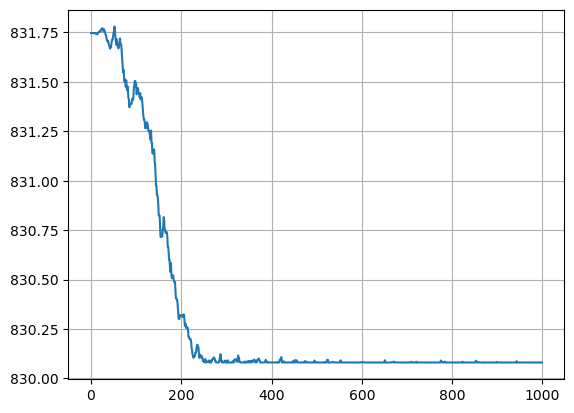

In [287]:
def randSolution(interval, xx):
    limInf, limSup = interval
    xx = (limSup - limInf)* np.random.random_sample((len(xx))) + limInf
    return xx

def clip(x, interval):
    #clip x value to interval
    limInf, limSup = interval
    return max(min(x, limSup), limInf)
'''
    if(x < limInf)
       x = limInf
    else if(x> limSup)
       x = limSup
'''
#esta funcion puede variar
def neighborSolution(x, interval, fraction):
    yy = []
    amplitude = (max(interval) - min(interval)) * fraction / 10.0
    delta = (-amplitude/2.) + amplitude * np.random.random() # posible modificacion

    for i in range(len(x)):
    #if np.random.random() <= 0.5:
        yy.append(clip(x[i] + delta, interval)) #la funcion clip verifica que me mantenga dentro de los limites de las variables
    #else:
      #yy.append(clip(x[i] - delta, interval))
    return yy

def acceptanceProbability(x, y, function, temp):
  if temp == 0:
    temp = 0.0001
  fx = function(x)
  fy = function(y)
  if fy < fx: #elitismo, si fy es mejor a fx reemplaza
    return True
  #cuando temp < 0 ==> p > 0
  p = np.exp(-(fy - fx)/temp) #se calcula la probabilidad con base en la ecuacion de Boltzman
  p = clip(p,(0,1))
  if np.random.random() < p: # probabilidad de que una peor solucion reemplace a una mejor solucion
    return True
  else:
    return False
      
def acceptanceHC(x, y, function): 
  fx = function(x)
  fy = function(y)
  if fy < fx: #elitismo, si fy es mejor a fx reemplaza
    return True 


def decreaseTemp1(beta, temp): # implementar las otras propuestas
   return temp-beta #lineal

def decreaseTempGeo( beta,temp):
    return (beta)*temp

def decreaseExp(beta, temp):
    return temp/(1+beta*temp)

def plotConvergence(iterations, states):
  plot(iterations, states)
  plt.grid()

def simulatedAnnealing(temp, maxSteps1, maxSteps2, numVar, interval, function):
  pruebas1=0
  x = [0.0] * numVar
  x = randSolution(interval, x)#solucion inicial
  print(x)
  states = [] #soluciones que encuentra
  temps = [] #niveles de temperatura
  beta = 2.5 # se pueden probar otros valores 
  for step in range(maxSteps1):
    fraction = step / float(maxSteps1)
    for j in range(maxSteps2):
      y = neighborSolution(x, interval, fraction)# vecindario
      #print("neighborSolution: ", y)
      if acceptanceProbability(x, y, function, temp):
        #print("Updating x value")
        x = y

      state = function(x)
      pruebas1+=1
      if pruebas1%200==0:
          print("X (",pruebas1,"): ", x, "FUNCTION VALUE ==> ", state, " Temp: ", temp)
      #print("X: ", x, "FUNCTION VALUE ==> ", state, " Temp: ", temp)
      #states.append([x, function(x)])
      states.append(state)
      temps.append(temp)
    temp = decreaseExp(beta, temp) #modificacion de la temp decrease
  return x, function(x), states, temps

def hillClimbing( maxSteps1, numVar, interval, function):
  pruebas1=0
  x = [0.0] * numVar
  x = randSolution(interval, x)#solucion inicial
  #print("X (",pruebas1,"): ", x, "FUNCTION VALUE ==> ", state, )
  states = [] #soluciones que encuentra 
  for step in range(maxSteps1):
    fraction = step / float(maxSteps1)
    y = neighborSolution(x, interval, fraction)# vecindario
    #print("neighborSolution: ", y)
    if acceptanceHC(x, y, function):
        #print("Updating x value")
        x = y
    
    state = function(x)
    pruebas1+=1
    if pruebas1%200==0:
        #print(state, )
        
        print("X",": ", x, "FUNCTION VALUE ==> ", state, )
    #states.append([x, function(x)])
    states.append(state)
  return x, function(x), states


temp=30.0 #probar otros valores
maxSteps1=100
maxSteps2=10
function = fschwefel #frasrigin#fackley#fschwefel #f0 #f1 # fP1
numVar = 2
interval = (-5.12,5.12)#<schwefel#(-5.12,5.12)#<rastringin#(-32.768,32.768)#< ackley #(-10,10 )#(-5, 10) #limite inferior y superior de la funcion a optimizar


#semillas 571 & 2122
np.random.seed(2122);
solution = simulatedAnnealing(temp, maxSteps1, maxSteps2, numVar, interval, function)
#solution = hillClimbing( maxSteps1, numVar, interval, function)

#print(solution)

iterations = range(maxSteps1*maxSteps2)

plotConvergence(iterations, solution[2])
#plotConvergence(iterations, solution[3])